# Automation on Classification taskss

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold , KFold
from sklearn.linear_model import LogisticRegression, RidgeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,plot_confusion_matrix,classification_report,confusion_matrix,accuracy_score,plot_roc_curve,roc_curve,plot_precision_recall_curve,precision_score,recall_score,roc_auc_score,log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
from pprint import pprint

In [2]:
df = pd.read_csv(r"C:\Users\dhchaudhary\Downloads\for_automation.csv")

In [3]:
print(df.shape)
df.head()

(5000, 21)


,event_name_af_login_D_3,event_name_install_D_7,event_name_af_complete_registration_D_3,event_name_af_complete_registration_D_0,event_name_af_complete_registration_D_1,conversion_type_re_engagement,event_name_af_complete_registration_D_2,event_name_af_remove_product_from_cart_D_2,event_name_af_remove_product_from_cart_D_0,event_name_af_content_view_D_7,...,event_name_af_content_view_D_5,event_name_af_share_D_0,event_name_af_cancellation_D_5,event_name_af_search_D_5,event_name_af_remove_product_from_cart_D_1,event_name_af_list_view_D_7,event_name_af_content_view_D_0,event_name_af_cancellation_D_6,event_name_af_list_view_D_4,P30
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = df.P30

In [5]:
y.value_counts()

0    4791
1     209
Name: P30, dtype: int64

In [6]:
x = df.drop(['P30'], axis =1)

In [7]:
x.shape

(5000, 20)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [9]:
y_test.value_counts()

0    1443
1      57
Name: P30, dtype: int64

## Logistic Reg

Test Accuracy:  0.9653333333333334
Precision:  1.0
Recall:  0.08771929824561403
F1-Score:  0.16129032258064516
Sensitivity:  0.08771929824561403
Specificity:  1.0
ROC-AUC Score:  0.543859649122807
Log Loss:  1.1973442483569046


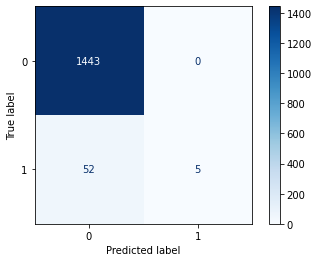

In [10]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
prediction_logreg = logreg.predict(x_test)

conf_matrix = confusion_matrix(y_test, prediction_logreg)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#Results
log_accuracy = accuracy_score(y_test,prediction_logreg)
log_precision = precision_score(y_test,prediction_logreg)
log_recall = recall_score(y_test,prediction_logreg)
log_f1_score = f1_score(y_test,prediction_logreg)
log_sensitivity = TP / float(TP+FN)
log_specificity = TN / float(TN+FP)
log_roc_auc_score = roc_auc_score(y_test,prediction_logreg) 
log_log_loss = log_loss(y_test,prediction_logreg) 
print("Test Accuracy: ",accuracy_score(y_test,prediction_logreg))
print("Precision: ",precision_score(y_test,prediction_logreg))
print("Recall: ",recall_score(y_test,prediction_logreg))
print("F1-Score: ",f1_score(y_test,prediction_logreg))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("ROC-AUC Score: ",roc_auc_score(y_test,prediction_logreg))
print("Log Loss: ",log_loss(y_test,prediction_logreg))
plot_confusion_matrix(logreg,x_test,y_test,cmap=plt.cm.Blues)
# plot_roc_curve(logreg,x_test,y_test)
# plot_precision_recall_curve(logreg,x_test,y_test)

### Tuned Logreg

In [11]:
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.960067 using {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [12]:
grid_result.best_estimator_

LogisticRegression(C=10, solver='newton-cg')

Test Accuracy:  0.966
Precision:  1.0
Recall:  0.10526315789473684
F1-Score:  0.1904761904761905
Sensitivity:  0.10526315789473684
Specificity:  1.0
ROC-AUC Score:  0.5526315789473684
Log Loss:  1.1743183974269642


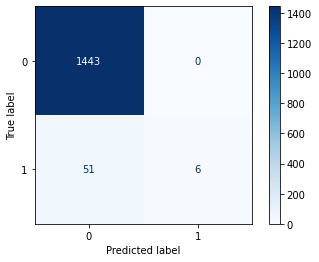

In [13]:
logreg_tun = grid_result.best_estimator_
logreg_tun.fit(x_train, y_train)
prediction_logreg_tun = logreg_tun.predict(x_test)

conf_matrix = confusion_matrix(y_test, prediction_logreg_tun)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#Results
log_tun_accuracy = accuracy_score(y_test,prediction_logreg_tun)
log_tun_precision = precision_score(y_test,prediction_logreg_tun)
log_tun_recall = recall_score(y_test,prediction_logreg_tun)
log_tun_f1_score = f1_score(y_test,prediction_logreg_tun)
log_tun_sensitivity = TP / float(TP+FN)
log_tun_specificity = TN / float(TN+FP)
log_tun_roc_auc_score = roc_auc_score(y_test,prediction_logreg_tun) 
log_tun_log_loss = log_loss(y_test,prediction_logreg_tun) 
print("Test Accuracy: ",accuracy_score(y_test,prediction_logreg_tun))
print("Precision: ",precision_score(y_test,prediction_logreg_tun))
print("Recall: ",recall_score(y_test,prediction_logreg_tun))
print("F1-Score: ",f1_score(y_test,prediction_logreg_tun))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("ROC-AUC Score: ",roc_auc_score(y_test,prediction_logreg_tun))
print("Log Loss: ",log_loss(y_test,prediction_logreg_tun))
plot_confusion_matrix(logreg_tun,x_test,y_test,cmap=plt.cm.Blues)
# plot_roc_curve(logreg_tun,x_test,y_test)
# plot_precision_recall_curve(logreg_tun,x_test,y_test)

## K- Nearest Neighbor

Test Accuracy:  0.964
Precision:  0.6
Recall:  0.15789473684210525
F1-Score:  0.25
Sensitivity:  0.15789473684210525
Specificity:  0.9958419958419958
ROC-AUC Score:  0.5768683663420505
Log Loss:  1.2433991486065064


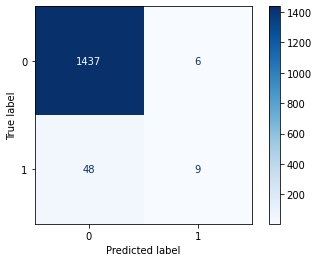

In [14]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
prediction_knn = knn.predict(x_test)

conf_matrix = confusion_matrix(y_test, prediction_knn)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#Results
knn_accuracy = accuracy_score(y_test,prediction_knn)
knn_precision = precision_score(y_test,prediction_knn)
knn_recall = recall_score(y_test,prediction_knn)
knn_f1_score = f1_score(y_test,prediction_knn)
knn_sensitivity = TP / float(TP+FN)
knn_specificity = TN / float(TN+FP)
knn_roc_auc_score = roc_auc_score(y_test,prediction_knn) 
knn_log_loss = log_loss(y_test,prediction_knn) 
print("Test Accuracy: ",accuracy_score(y_test,prediction_knn))
print("Precision: ",precision_score(y_test,prediction_knn))
print("Recall: ",recall_score(y_test,prediction_knn))
print("F1-Score: ",f1_score(y_test,prediction_knn))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("ROC-AUC Score: ",roc_auc_score(y_test,prediction_knn))
print("Log Loss: ",log_loss(y_test,prediction_knn))
plot_confusion_matrix(knn,x_test,y_test,cmap=plt.cm.Blues)
# plot_roc_curve(knn,x_test,y_test)
# plot_precision_recall_curve(knn,x_test,y_test)

### Tuned KNN

In [15]:
model = KNeighborsClassifier()
n_neighbors = range(1, 21, 2)
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.957600 using {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}


In [16]:
grid_result.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

Test Accuracy:  0.962
Precision:  0.5
Recall:  0.07017543859649122
F1-Score:  0.12307692307692307
Sensitivity:  0.07017543859649122
Specificity:  0.9972279972279973
ROC-AUC Score:  0.5337017179122443
Log Loss:  1.3124756352664204


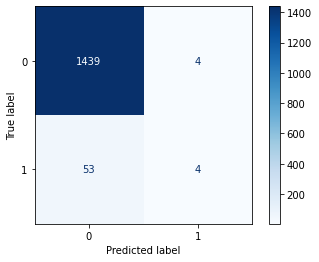

In [17]:
knn_tun = grid_result.best_estimator_
knn_tun.fit(x_train, y_train)
prediction_knn_tun = knn_tun.predict(x_test)

conf_matrix = confusion_matrix(y_test, prediction_knn_tun)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#Results
knn_tun_accuracy = accuracy_score(y_test,prediction_knn_tun)
knn_tun_precision = precision_score(y_test,prediction_knn_tun)
knn_tun_recall = recall_score(y_test,prediction_knn_tun)
knn_tun_f1_score = f1_score(y_test,prediction_knn_tun)
knn_tun_sensitivity = TP / float(TP+FN)
knn_tun_specificity = TN / float(TN+FP)
knn_tun_roc_auc_score = roc_auc_score(y_test,prediction_knn_tun) 
knn_tun_log_loss = log_loss(y_test,prediction_knn_tun)
print("Test Accuracy: ",accuracy_score(y_test,prediction_knn_tun))
print("Precision: ",precision_score(y_test,prediction_knn_tun))
print("Recall: ",recall_score(y_test,prediction_knn_tun))
print("F1-Score: ",f1_score(y_test,prediction_knn_tun))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("ROC-AUC Score: ",roc_auc_score(y_test,prediction_knn_tun))
print("Log Loss: ",log_loss(y_test,prediction_knn_tun))
plot_confusion_matrix(knn_tun,x_test,y_test,cmap=plt.cm.Blues)
# plot_roc_curve(knn_tun,x_test,y_test)
# plot_precision_recall_curve(knn_tun,x_test,y_test)

## Random Forest

Test Accuracy:  0.9646666666666667
Precision:  0.7
Recall:  0.12280701754385964
F1-Score:  0.208955223880597
Sensitivity:  0.12280701754385964
Specificity:  0.997920997920998
ROC-AUC Score:  0.5603640077324288
Log Loss:  1.2203716984817052


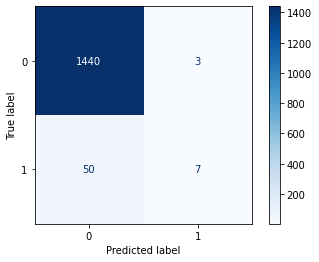

In [18]:
randomf = RandomForestClassifier()
randomf.fit(x_train, y_train)
prediction_randomf = randomf.predict(x_test)

conf_matrix = confusion_matrix(y_test, prediction_randomf)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#Results
randomf_accuracy = accuracy_score(y_test,prediction_randomf)
randomf_precision = precision_score(y_test,prediction_randomf)
randomf_recall = recall_score(y_test,prediction_randomf)
randomf_f1_score = f1_score(y_test,prediction_randomf)
randomf_sensitivity = TP / float(TP+FN)
randomf_specificity = TN / float(TN+FP)
randomf_roc_auc_score = roc_auc_score(y_test,prediction_randomf) 
randomf_log_loss = log_loss(y_test,prediction_randomf)
print("Test Accuracy: ",accuracy_score(y_test,prediction_randomf))
print("Precision: ",precision_score(y_test,prediction_randomf))
print("Recall: ",recall_score(y_test,prediction_randomf))
print("F1-Score: ",f1_score(y_test,prediction_randomf))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("ROC-AUC Score: ",roc_auc_score(y_test,prediction_randomf))
print("Log Loss: ",log_loss(y_test,prediction_randomf))
plot_confusion_matrix(randomf,x_test,y_test,cmap=plt.cm.Blues)
# plot_roc_curve(randomf,x_test,y_test)
# plot_precision_recall_curve(randomf,x_test,y_test)

### Tuned random forest

In [19]:
%%time
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 30, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# define grid search
# grid = dict(n_estimators=n_estimators,max_features=max_features,
#             min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, bootstrap=bootstrap)

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
random_search = RandomizedSearchCV(estimator=model, param_distributions = random_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
random_result = random_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.960667 using {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
Wall time: 6min 38s


In [20]:
random_result.best_estimator_

RandomForestClassifier(max_depth=30, max_features='log2', min_samples_split=10,
                       n_estimators=1000)

Test Accuracy:  0.9646666666666667
Precision:  0.75
Recall:  0.10526315789473684
F1-Score:  0.1846153846153846
Sensitivity:  0.10526315789473684
Specificity:  0.9986139986139986
ROC-AUC Score:  0.5519385782543677
Log Loss:  1.220371165416752


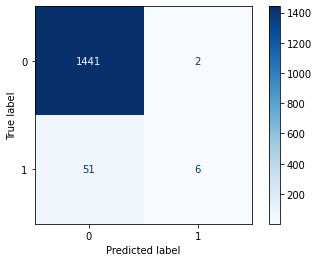

In [21]:
randomf_tun = random_result.best_estimator_
randomf_tun.fit(x_train, y_train)
prediction_randomf_tun = randomf_tun.predict(x_test)

conf_matrix = confusion_matrix(y_test, prediction_randomf_tun)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#Results
randomf_tun_accuracy = accuracy_score(y_test,prediction_randomf_tun)
randomf_tun_precision = precision_score(y_test,prediction_randomf_tun)
randomf_tun_recall = recall_score(y_test,prediction_randomf_tun)
randomf_tun_f1_score = f1_score(y_test,prediction_randomf_tun)
randomf_tun_sensitivity = TP / float(TP+FN)
randomf_tun_specificity = TN / float(TN+FP)
randomf_tun_roc_auc_score = roc_auc_score(y_test,prediction_randomf_tun) 
randomf_tun_log_loss = log_loss(y_test,prediction_randomf_tun)
print("Test Accuracy: ",accuracy_score(y_test,prediction_randomf_tun))
print("Precision: ",precision_score(y_test,prediction_randomf_tun))
print("Recall: ",recall_score(y_test,prediction_randomf_tun))
print("F1-Score: ",f1_score(y_test,prediction_randomf_tun))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("ROC-AUC Score: ",roc_auc_score(y_test,prediction_randomf_tun))
print("Log Loss: ",log_loss(y_test,prediction_randomf_tun))
plot_confusion_matrix(randomf_tun,x_test,y_test,cmap=plt.cm.Blues)
# plot_roc_curve(randomf_tun,x_test,y_test)
# plot_precision_recall_curve(randomf_tun,x_test,y_test)

## Ridge Classifier

Test Accuracy:  0.966
Precision:  1.0
Recall:  0.10526315789473684
F1-Score:  0.1904761904761905
Sensitivity:  0.10526315789473684
Specificity:  1.0
ROC-AUC Score:  0.5526315789473684
Log Loss:  1.1743183974269642


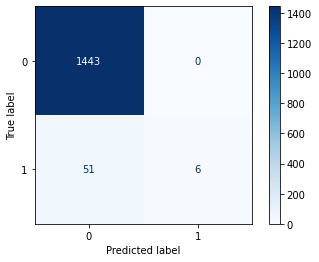

In [22]:
ridge = RidgeClassifier()
ridge.fit(x_train, y_train)
prediction_ridge = ridge.predict(x_test)

conf_matrix = confusion_matrix(y_test, prediction_ridge)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#Results
ridge_accuracy = accuracy_score(y_test,prediction_ridge)
ridge_precision = precision_score(y_test,prediction_ridge)
ridge_recall = recall_score(y_test,prediction_ridge)
ridge_f1_score = f1_score(y_test,prediction_ridge)
ridge_sensitivity = TP / float(TP+FN)
ridge_specificity = TN / float(TN+FP)
ridge_roc_auc_score = roc_auc_score(y_test,prediction_ridge) 
ridge_log_loss = log_loss(y_test,prediction_ridge)
print("Test Accuracy: ",accuracy_score(y_test,prediction_ridge))
print("Precision: ",precision_score(y_test,prediction_ridge))
print("Recall: ",recall_score(y_test,prediction_ridge))
print("F1-Score: ",f1_score(y_test,prediction_ridge))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("ROC-AUC Score: ",roc_auc_score(y_test,prediction_ridge))
print("Log Loss: ",log_loss(y_test,prediction_ridge))
plot_confusion_matrix(ridge,x_test,y_test,cmap=plt.cm.Blues)
# plot_roc_curve(ridge,x_test,y_test)
# plot_precision_recall_curve(ridge,x_test,y_test)

### Tuned ridge

In [23]:
%%time
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.960867 using {'alpha': 0.8}
Wall time: 2.61 s


In [24]:
grid_result.best_estimator_

RidgeClassifier(alpha=0.8)

Test Accuracy:  0.966
Precision:  1.0
Recall:  0.10526315789473684
F1-Score:  0.1904761904761905
Sensitivity:  0.10526315789473684
Specificity:  1.0
ROC-AUC Score:  0.5526315789473684
Log Loss:  1.1743183974269642


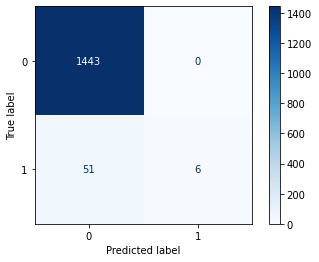

In [25]:
ridge_tun = grid_result.best_estimator_
ridge_tun.fit(x_train, y_train)
prediction_ridge_tun = ridge_tun.predict(x_test)

conf_matrix = confusion_matrix(y_test, prediction_ridge_tun)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#Results
ridge_tun_accuracy = accuracy_score(y_test,prediction_ridge_tun)
ridge_tun_precision = precision_score(y_test,prediction_ridge_tun)
ridge_tun_recall = recall_score(y_test,prediction_ridge_tun)
ridge_tun_f1_score = f1_score(y_test,prediction_ridge_tun)
ridge_tun_sensitivity = TP / float(TP+FN)
ridge_tun_specificity = TN / float(TN+FP)
ridge_tun_roc_auc_score = roc_auc_score(y_test,prediction_ridge_tun) 
ridge_tun_log_loss = log_loss(y_test,prediction_ridge_tun)
print("Test Accuracy: ",accuracy_score(y_test,prediction_ridge_tun))
print("Precision: ",precision_score(y_test,prediction_ridge_tun))
print("Recall: ",recall_score(y_test,prediction_ridge_tun))
print("F1-Score: ",f1_score(y_test,prediction_ridge_tun))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("ROC-AUC Score: ",roc_auc_score(y_test,prediction_ridge_tun))
print("Log Loss: ",log_loss(y_test,prediction_ridge_tun))
plot_confusion_matrix(ridge_tun,x_test,y_test,cmap=plt.cm.Blues)
# plot_roc_curve(ridge_tun,x_test,y_test)
# plot_precision_recall_curve(ridge_tun,x_test,y_test)

## Support vector Machine (SVM)

Test Accuracy:  0.9626666666666667
Precision:  0.6666666666666666
Recall:  0.03508771929824561
F1-Score:  0.06666666666666667
Sensitivity:  0.03508771929824561
Specificity:  0.9993069993069993
ROC-AUC Score:  0.5171973593026226
Log Loss:  1.2894481851416197


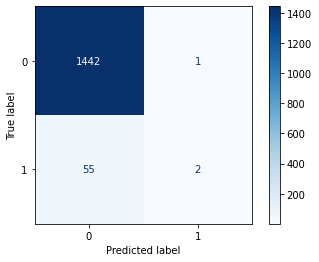

In [26]:
svc = SVC()
svc.fit(x_train, y_train)
prediction_svc = svc.predict(x_test)

conf_matrix = confusion_matrix(y_test, prediction_svc)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#Results
svc_accuracy = accuracy_score(y_test,prediction_svc)
svc_precision = precision_score(y_test,prediction_svc)
svc_recall = recall_score(y_test,prediction_svc)
svc_f1_score = f1_score(y_test,prediction_svc)
svc_sensitivity = TP / float(TP+FN)
svc_specificity = TN / float(TN+FP)
svc_roc_auc_score = roc_auc_score(y_test,prediction_svc) 
svc_log_loss = log_loss(y_test,prediction_svc)
print("Test Accuracy: ",accuracy_score(y_test,prediction_svc))
print("Precision: ",precision_score(y_test,prediction_svc))
print("Recall: ",recall_score(y_test,prediction_svc))
print("F1-Score: ",f1_score(y_test,prediction_svc))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("ROC-AUC Score: ",roc_auc_score(y_test,prediction_svc))
print("Log Loss: ",log_loss(y_test,prediction_svc))
plot_confusion_matrix(svc,x_test,y_test,cmap=plt.cm.Blues)
# plot_roc_curve(svc,x_test,y_test)
# plot_precision_recall_curve(svc,x_test,y_test)

## Tuned SVC

In [27]:
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.959533 using {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}


In [28]:
grid_result.best_estimator_

SVC(C=0.1, kernel='poly')

Test Accuracy:  0.962
Precision:  0.5
Recall:  0.05263157894736842
F1-Score:  0.09523809523809525
Sensitivity:  0.05263157894736842
Specificity:  0.997920997920998
ROC-AUC Score:  0.5252762884341832
Log Loss:  1.3124751022014671


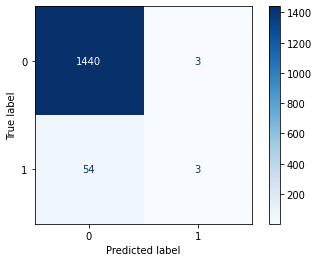

In [29]:
svc_tun = grid_result.best_estimator_
svc_tun.fit(x_train, y_train)
prediction_svc_tun = svc_tun.predict(x_test)

conf_matrix = confusion_matrix(y_test, prediction_svc_tun)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#Results
svc_tun_accuracy = accuracy_score(y_test,prediction_svc_tun)
svc_tun_precision = precision_score(y_test,prediction_svc_tun)
svc_tun_recall = recall_score(y_test,prediction_svc_tun)
svc_tun_f1_score = f1_score(y_test,prediction_svc_tun)
svc_tun_sensitivity = TP / float(TP+FN)
svc_tun_specificity = TN / float(TN+FP)
svc_tun_roc_auc_score = roc_auc_score(y_test,prediction_svc_tun) 
svc_tun_log_loss = log_loss(y_test,prediction_svc_tun)
print("Test Accuracy: ",accuracy_score(y_test,prediction_svc_tun))
print("Precision: ",precision_score(y_test,prediction_svc_tun))
print("Recall: ",recall_score(y_test,prediction_svc_tun))
print("F1-Score: ",f1_score(y_test,prediction_svc_tun))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("ROC-AUC Score: ",roc_auc_score(y_test,prediction_svc_tun))
print("Log Loss: ",log_loss(y_test,prediction_svc_tun))
plot_confusion_matrix(svc_tun,x_test,y_test,cmap=plt.cm.Blues)
# plot_roc_curve(svc_tun,x_test,y_test)
# plot_precision_recall_curve(svc_tun,x_test,y_test)

## Gradient Boosting Classifier

Test Accuracy:  0.9646666666666667
Precision:  0.75
Recall:  0.10526315789473684
F1-Score:  0.1846153846153846
Sensitivity:  0.10526315789473684
Specificity:  0.9986139986139986
ROC-AUC Score:  0.5519385782543677
Log Loss:  1.220371165416752


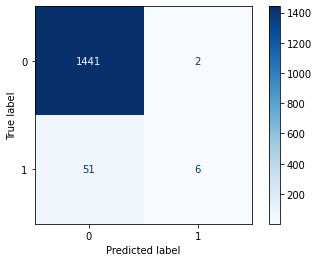

In [30]:
gradientboost = GradientBoostingClassifier()
gradientboost.fit(x_train, y_train)
prediction_gradientboost = gradientboost.predict(x_test)

conf_matrix = confusion_matrix(y_test, prediction_gradientboost)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#Results
gradientbos_accuracy = accuracy_score(y_test,prediction_gradientboost)
gradientbos_precision = precision_score(y_test,prediction_gradientboost)
gradientbos_recall = recall_score(y_test,prediction_gradientboost)
gradientbos_f1_score = f1_score(y_test,prediction_gradientboost)
gradientbos_sensitivity = TP / float(TP+FN)
gradientbos_specificity = TN / float(TN+FP)
gradientbos_roc_auc_score = roc_auc_score(y_test,prediction_gradientboost) 
gradientbos_log_loss = log_loss(y_test,prediction_gradientboost)
print("Test Accuracy: ",accuracy_score(y_test,prediction_gradientboost))
print("Precision: ",precision_score(y_test,prediction_gradientboost))
print("Recall: ",recall_score(y_test,prediction_gradientboost))
print("F1-Score: ",f1_score(y_test,prediction_gradientboost))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("ROC-AUC Score: ",roc_auc_score(y_test,prediction_gradientboost))
print("Log Loss: ",log_loss(y_test,prediction_gradientboost))
plot_confusion_matrix(gradientboost,x_test,y_test,cmap=plt.cm.Blues)
# plot_roc_curve(gradientboost,x_test,y_test)
# plot_precision_recall_curve(gradientboost,x_test,y_test)

### Tuned gradient boosting

In [31]:
%%time
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
# define grid search
random_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
random_search = RandomizedSearchCV(estimator=model, param_distributions = random_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
random_result = random_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.960067 using {'subsample': 0.7, 'n_estimators': 1000, 'max_depth': 3, 'learning_rate': 0.01}
Wall time: 7min 23s


In [32]:
random_result.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000, subsample=0.7)

Test Accuracy:  0.9646666666666667
Precision:  0.7
Recall:  0.12280701754385964
F1-Score:  0.208955223880597
Sensitivity:  0.12280701754385964
Specificity:  0.997920997920998
ROC-AUC Score:  0.5603640077324288
Log Loss:  1.2203716984817052


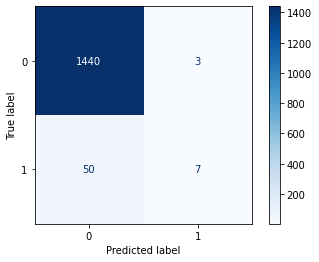

In [33]:
gradientboost_tun = random_result.best_estimator_
gradientboost_tun.fit(x_train, y_train)
prediction_gradientboost_tun = gradientboost_tun.predict(x_test)

conf_matrix = confusion_matrix(y_test, prediction_gradientboost_tun)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#Results
gradientbos_tun_accuracy = accuracy_score(y_test,prediction_gradientboost_tun)
gradientbos_tun_precision = precision_score(y_test,prediction_gradientboost_tun)
gradientbos_tun_recall = recall_score(y_test,prediction_gradientboost_tun)
gradientbos_tun_f1_score = f1_score(y_test,prediction_gradientboost_tun)
gradientbos_tun_sensitivity = TP / float(TP+FN)
gradientbos_tun_specificity = TN / float(TN+FP)
gradientbos_tun_roc_auc_score = roc_auc_score(y_test,prediction_gradientboost_tun) 
gradientbos_tun_log_loss = log_loss(y_test,prediction_gradientboost_tun)
print("Test Accuracy: ",accuracy_score(y_test,prediction_gradientboost_tun))
print("Precision: ",precision_score(y_test,prediction_gradientboost_tun))
print("Recall: ",recall_score(y_test,prediction_gradientboost_tun))
print("F1-Score: ",f1_score(y_test,prediction_gradientboost_tun))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("ROC-AUC Score: ",roc_auc_score(y_test,prediction_gradientboost_tun))
print("Log Loss: ",log_loss(y_test,prediction_gradientboost_tun))
plot_confusion_matrix(gradientboost_tun,x_test,y_test,cmap=plt.cm.Blues)
# plot_roc_curve(gradientboost_tun,x_test,y_test)
# plot_precision_recall_curve(gradientboost_tun,x_test,y_test)

## XGB Classifier 

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:45:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Accuracy:  0.9626666666666667
Precision:  0.5714285714285714
Recall:  0.07017543859649122
F1-Score:  0.125
Sensitivity:  0.07017543859649122
Specificity:  0.997920997920998
ROC-AUC Score:  0.5340482182587446
Log Loss:  1.2894492512715265


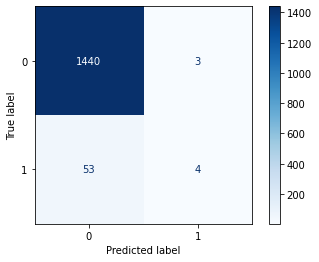

In [34]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)
prediction_xgb = xgb.predict(x_test)

conf_matrix = confusion_matrix(y_test, prediction_xgb)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#Results
xgb_accuracy = accuracy_score(y_test,prediction_xgb)
xgb_precision = precision_score(y_test,prediction_xgb)
xgb_recall = recall_score(y_test,prediction_xgb)
xgb_f1_score = f1_score(y_test,prediction_xgb)
xgb_sensitivity = TP / float(TP+FN)
xgb_specificity = TN / float(TN+FP)
xgb_roc_auc_score = roc_auc_score(y_test,prediction_xgb) 
xgb_log_loss = log_loss(y_test,prediction_xgb)
print("Test Accuracy: ",accuracy_score(y_test,prediction_xgb))
print("Precision: ",precision_score(y_test,prediction_xgb))
print("Recall: ",recall_score(y_test,prediction_xgb))
print("F1-Score: ",f1_score(y_test,prediction_xgb))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("ROC-AUC Score: ",roc_auc_score(y_test,prediction_xgb))
print("Log Loss: ",log_loss(y_test,prediction_xgb))
plot_confusion_matrix(xgb,x_test,y_test,cmap=plt.cm.Blues)
# plot_roc_curve(xgb,x_test,y_test)
# plot_precision_recall_curve(xgb,x_test,y_test)

### Tuned XGB

In [35]:
%%time
model = XGBClassifier()
random_grid = {
        'n_estimators' : [10, 100, 1000],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
# cv = KFold(n_splits=2)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# gs = GridSearchCV(estimator = XGBClassifier(n_estimators=500), param_grid = grid, scoring='accuracy',n_jobs=-1, cv=cv)
random_search = RandomizedSearchCV(estimator=model, param_distributions = random_grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
random_result = random_search.fit(x, y)
# summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

c:\users\dhchaudhary\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:52:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Best: 0.959200 using {'subsample': 0.8, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 1.5, 'colsample_bytree': 1.0}
Wall time: 7min 45s


In [36]:
random_result.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=1.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

[08:52:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Test Accuracy:  0.962
Precision:  0.5
Recall:  0.05263157894736842
F1-Score:  0.09523809523809525
Sensitivity:  0.05263157894736842
Specificity:  0.997920997920998
ROC-AUC Score:  0.5252762884341832
Log Loss:  1.3124751022014671


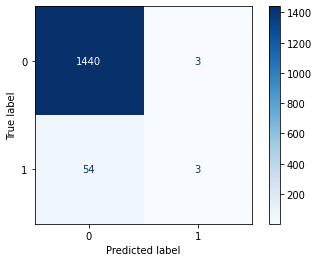

In [37]:
xgb_tun = random_result.best_estimator_
xgb_tun.fit(x_train, y_train)
prediction_xgb_tun = xgb_tun.predict(x_test)

conf_matrix = confusion_matrix(y_test, prediction_xgb_tun)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1]
FN = conf_matrix[1][0]

#Results
xgb_tun_accuracy = accuracy_score(y_test,prediction_xgb_tun)
xgb_tun_precision = precision_score(y_test,prediction_xgb_tun)
xgb_tun_recall = recall_score(y_test,prediction_xgb_tun)
xgb_tun_f1_score = f1_score(y_test,prediction_xgb_tun)
xgb_tun_sensitivity = TP / float(TP+FN)
xgb_tun_specificity = TN / float(TN+FP)
xgb_tun_roc_auc_score = roc_auc_score(y_test,prediction_xgb_tun) 
xgb_tun_log_loss = log_loss(y_test,prediction_xgb_tun)
print("Test Accuracy: ",accuracy_score(y_test,prediction_xgb_tun))
print("Precision: ",precision_score(y_test,prediction_xgb_tun))
print("Recall: ",recall_score(y_test,prediction_xgb_tun))
print("F1-Score: ",f1_score(y_test,prediction_xgb_tun))
print("Sensitivity: ",TP / float(TP+FN))
print("Specificity: ",TN / float(TN+FP))
print("ROC-AUC Score: ",roc_auc_score(y_test,prediction_xgb_tun))
print("Log Loss: ",log_loss(y_test,prediction_xgb_tun))
plot_confusion_matrix(xgb_tun,x_test,y_test,cmap=plt.cm.Blues)
# plot_roc_curve(xgb_tun,x_test,y_test)
# plot_precision_recall_curve(xgb_tun,x_test,y_test)

In [38]:
if precision_score(y_test,prediction_xgb_tun)>precision_score(y_test,prediction_xgb):
    print(max(precision_score(y_test,prediction_xgb_tun),precision_score(y_test,prediction_xgb) ))

In [39]:
all_classification_model = pd.DataFrame(columns=['Accuracy', 'Sensitivity(recall)', 'Specificity', 'Precision', 'F1-Score', 'ROC-AUC Score'])

In [40]:
all_classification_model

,Accuracy,Sensitivity(recall),Specificity,Precision,F1-Score,ROC-AUC Score


In [41]:
model = ['Logistic', 'Tuned Logistic', 'KNN', 'Tuned KNN', 'Random forest', 'Tuned Random forest', 'Ridge', 'Tuned Ridge', 'SVM', 'Tuned SVM', 'Gradient Boost', 'Tuned Gradient Boost', 'XGB', 'Tuned XGB']

In [42]:
# for i in model:
all_classification_model.loc['Logistic'] =[log_accuracy, log_sensitivity, log_specificity, log_precision, log_f1_score, log_roc_auc_score]
all_classification_model.loc['Tuned Logistic'] =[log_tun_accuracy, log_tun_sensitivity, log_tun_specificity, log_tun_precision, log_tun_f1_score, log_tun_roc_auc_score]
all_classification_model.loc['KNN'] =[knn_accuracy, knn_sensitivity, knn_specificity, knn_precision, knn_f1_score, knn_roc_auc_score]
all_classification_model.loc['Tuned KNN'] =[knn_tun_accuracy, knn_tun_sensitivity, knn_tun_specificity, knn_tun_precision, knn_tun_f1_score, knn_tun_roc_auc_score]
all_classification_model.loc['Random forest'] =[randomf_accuracy, randomf_sensitivity, randomf_specificity, randomf_precision, randomf_f1_score, randomf_roc_auc_score]
all_classification_model.loc['Tuned Random forest'] =[randomf_tun_accuracy, randomf_tun_sensitivity, randomf_tun_specificity, randomf_tun_precision, randomf_tun_f1_score, randomf_tun_roc_auc_score]
all_classification_model.loc['Ridge'] =[ridge_accuracy, ridge_sensitivity, ridge_specificity, ridge_precision, ridge_f1_score, ridge_roc_auc_score]
all_classification_model.loc['Tuned Ridge'] =[ridge_tun_accuracy, ridge_tun_sensitivity, ridge_tun_specificity, ridge_tun_precision, ridge_tun_f1_score, ridge_tun_roc_auc_score]
all_classification_model.loc['SVM'] =[svc_accuracy, svc_sensitivity, svc_specificity, svc_precision, svc_f1_score, svc_roc_auc_score]
all_classification_model.loc['Tuned SVM'] =[svc_tun_accuracy, svc_tun_sensitivity, svc_tun_specificity, svc_tun_precision, svc_tun_f1_score, svc_tun_roc_auc_score]
all_classification_model.loc['Gradient Boost'] =[gradientbos_accuracy, gradientbos_sensitivity, gradientbos_specificity, gradientbos_precision, gradientbos_f1_score, gradientbos_roc_auc_score]
all_classification_model.loc['Tuned Gradient Boost'] =[gradientbos_tun_accuracy, gradientbos_tun_sensitivity, gradientbos_tun_specificity, gradientbos_tun_precision, gradientbos_tun_f1_score, gradientbos_tun_roc_auc_score]
all_classification_model.loc['XGB'] =[xgb_accuracy, xgb_sensitivity, xgb_specificity, xgb_precision, xgb_f1_score, xgb_roc_auc_score]
all_classification_model.loc['Tuned XGB'] =[xgb_tun_accuracy, xgb_tun_sensitivity, xgb_tun_specificity, xgb_tun_precision, xgb_tun_f1_score, xgb_tun_roc_auc_score]





In [43]:
all_classification_model

,Accuracy,Sensitivity(recall),Specificity,Precision,F1-Score,ROC-AUC Score
Logistic,0.965333,0.087719,1.000000,1.000000,0.161290,0.543860
Tuned Logistic,0.966000,0.105263,1.000000,1.000000,0.190476,0.552632
KNN,0.964000,0.157895,0.995842,0.600000,0.250000,0.576868
Tuned KNN,0.962000,0.070175,0.997228,0.500000,0.123077,0.533702
Random forest,0.964667,0.122807,0.997921,0.700000,0.208955,0.560364
Tuned Random forest,0.964667,0.105263,0.998614,0.750000,0.184615,0.551939
Ridge,0.966000,0.105263,1.000000,1.000000,0.190476,0.552632
Tuned Ridge,0.966000,0.105263,1.000000,1.000000,0.190476,0.552632
SVM,0.962667,0.035088,0.999307,0.666667,0.066667,0.517197
Tuned SVM,0.962000,0.052632,0.997921,0.500000,0.095238,0.525276
